# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1.Basic Data Exploration
<a id='1'></a>

In [22]:


# Identify the number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}","*"*20,sep='\n')

# Determine data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types,"*"*20,sep='\n')

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Number of rows: 148654
Number of columns: 13
********************

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
********************

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2.Descriptive Statistics
<a id='2'></a>

In [23]:
# Calculate basic statistics
basic_stats = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].describe()
print("\nBasic statistics:")
print(basic_stats,"*"*20,sep='\n')

# Determine the range of salaries
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
print(f"\nRange of salaries: {salary_range}","*"*20,sep='\n')

# Find the standard deviation of salaries
salary_std_dev = df['TotalPay'].std()
print(f"\nStandard deviation of salaries: {salary_std_dev}")



Basic statistics:
             BasePay    OvertimePay       OtherPay       Benefits  \
count  148045.000000  148650.000000  148650.000000  112491.000000   
mean    66325.448841    5066.059886    3648.767297   25007.893151   
std     42764.635495   11454.380559    8056.601866   15402.215858   
min      -166.010000      -0.010000   -7058.590000     -33.890000   
25%     33588.200000       0.000000       0.000000   11535.395000   
50%     65007.450000       0.000000     811.270000   28628.620000   
75%     94691.050000    4658.175000    4236.065000   35566.855000   
max    319275.010000  245131.880000  400184.250000   96570.660000   

            TotalPay  TotalPayBenefits  
count  148654.000000     148654.000000  
mean    74768.321972      93692.554811  
std     50517.005274      62793.533483  
min      -618.130000       -618.130000  
25%     36168.995000      44065.650000  
50%     71426.610000      92404.090000  
75%    105839.135000     132876.450000  
max    567595.430000     567595

# 3. Data Cleaning 
<a id='3'></a>
<p style='color:red'> -Used the median because the data is skewd, if it was normally distributed would have used the mean</p>
<p style='color:red'> -Dropped the values for 'OvertimePay' and 'OtherPay' because they are only 4</p>

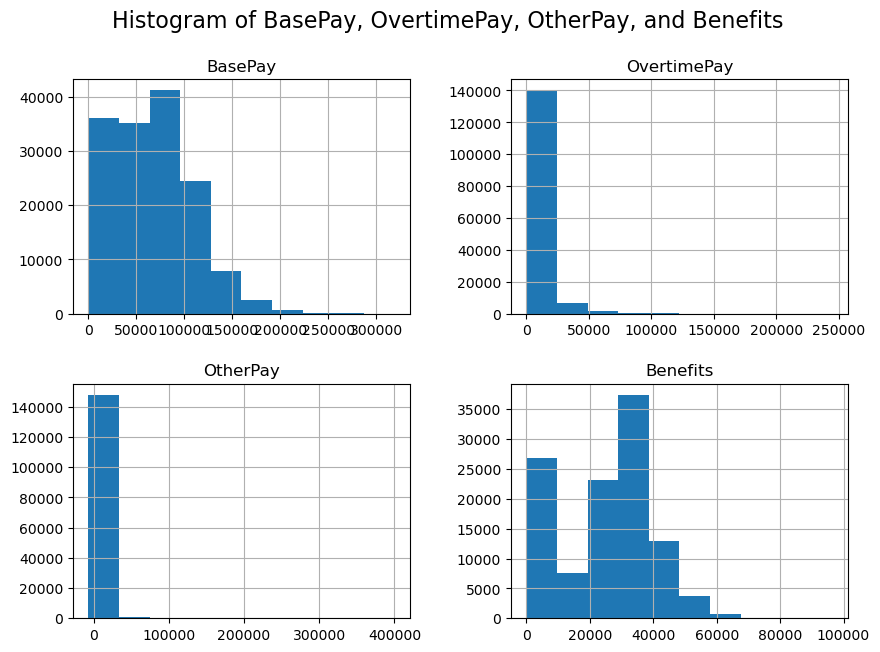

In [24]:
# Create a histogram of the columns with missing data
df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].hist(bins=10, figsize=(10, 7))
plt.suptitle("Histogram of BasePay, OvertimePay, OtherPay, and Benefits", fontsize=16)
plt.show()

In [25]:
# Fill missing values with the mean
df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df.dropna(subset=['OvertimePay'], inplace=True)
df.dropna(subset=['OtherPay'], inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

In [26]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148650
Agency                   0
Status              148650
dtype: int64


# 4.Basic Data Visualization
<a id='4'></a>

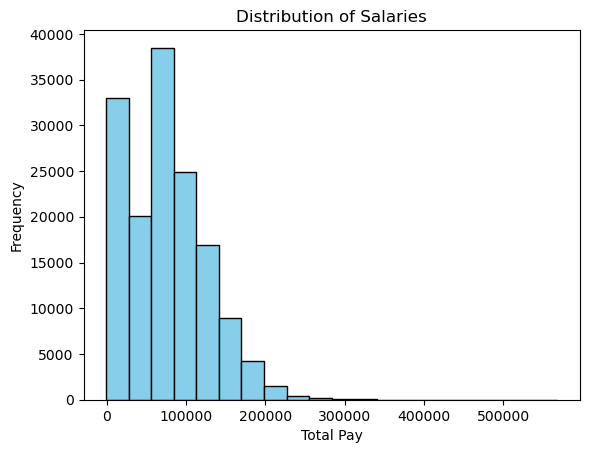

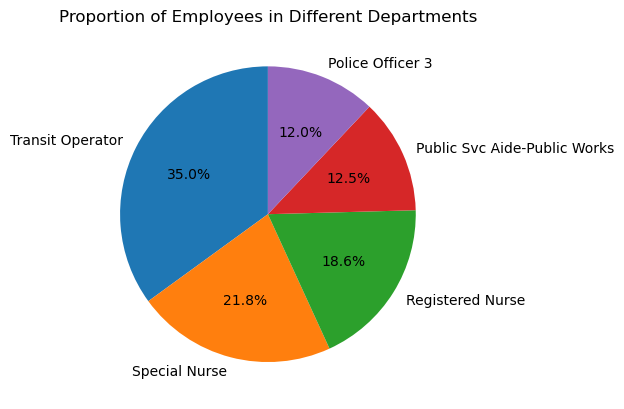

In [27]:
import matplotlib.pyplot as plt

# Create histograms to visualize the distribution of salaries
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Use pie charts to represent the proportion of employees in different departments
department_counts = df['JobTitle'].value_counts()
top_departments = department_counts.head(5)  # Displaying the top 5 departments
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()


# 5.Grouped Analysis
<a id='5'></a>

In [28]:
average_salaries_by_department = df.groupby('JobTitle')['TotalPay'].mean()

# Compare average salaries across different departments
print("\nAverage Salaries by Department:")
print(average_salaries_by_department)


Average Salaries by Department:
JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2158, dtype: float64


# 6.Simple Correlation Analysis
<a id='6'></a>


Correlation Matrix:
                  TotalPay   BasePay  OvertimePay  OtherPay  Benefits  \
TotalPay          1.000000  0.950716     0.504859  0.470496  0.773590   
BasePay           0.950716  1.000000     0.266688  0.283747  0.797311   
OvertimePay       0.504859  0.266688     1.000000  0.316592  0.263702   
OtherPay          0.470496  0.283747     0.316592  1.000000  0.202009   
Benefits          0.773590  0.797311     0.263702  0.202009  1.000000   
TotalPayBenefits  0.977312  0.943193     0.467981  0.422341  0.814628   

                  TotalPayBenefits  
TotalPay                  0.977312  
BasePay                   0.943193  
OvertimePay               0.467981  
OtherPay                  0.422341  
Benefits                  0.814628  
TotalPayBenefits          1.000000  


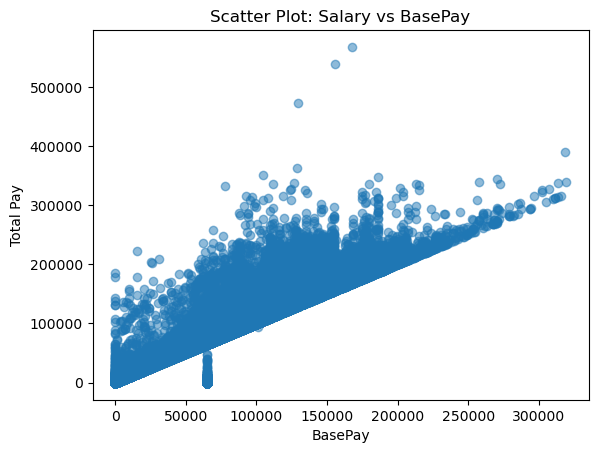

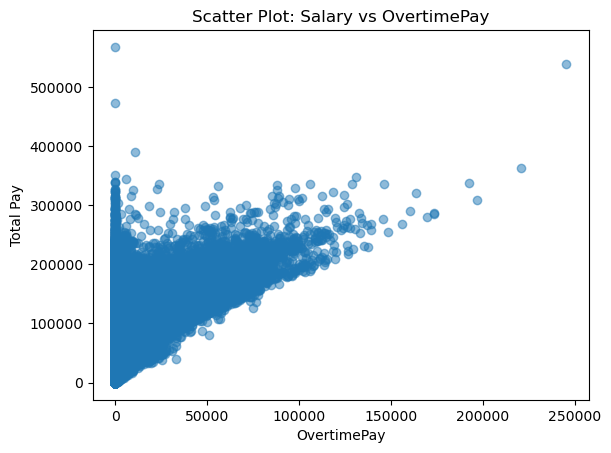

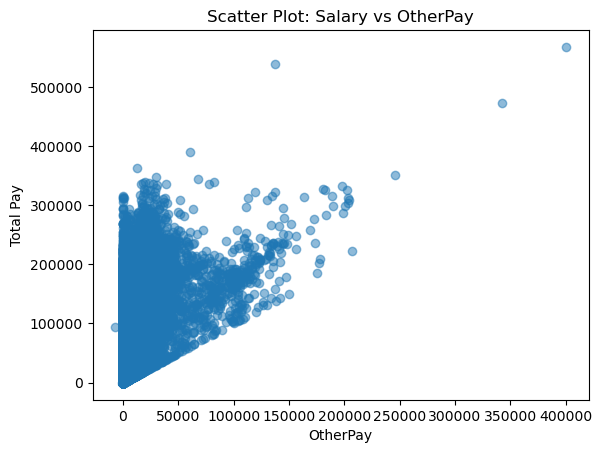

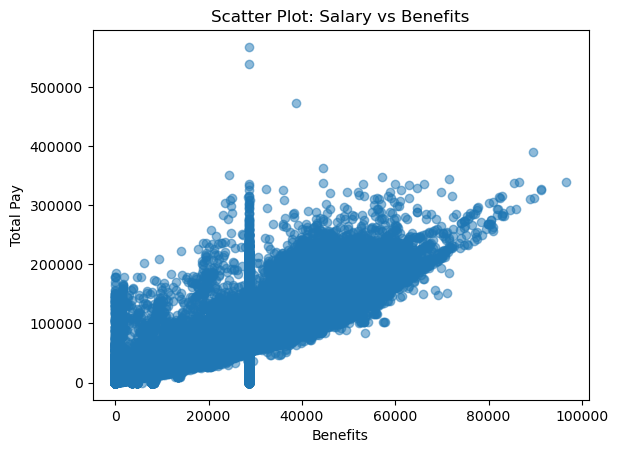

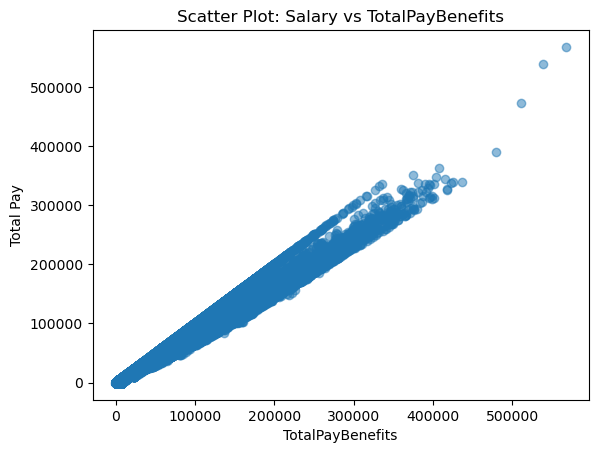

In [29]:
# Identify correlation between 'TotalPay' and all other numerical columns
correlation_all = df[['TotalPay', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']].corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_all)

# Plot scatter plots to visualize the relationships
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']

for column in numerical_columns:
    plt.scatter(df[column], df['TotalPay'], alpha=0.5)
    plt.title(f'Scatter Plot: Salary vs {column}')
    plt.xlabel(column)
    plt.ylabel('Total Pay')
    plt.show()


# 7.Summary of Insights


<!-- Basic Data Exploration -->
<h3 style="color: #1f77b4;"><a href="#1" style="text-decoration: none; color: inherit;">Basic Data Exploration</a></h3>
<p>
    From Basic Data Exploration, we can find that the 'Notes' and 'Status' columns are optional and don't contribute much to the data, as they are missing most of the values. It would be beneficial to remove these columns.
</p>

<!-- Basic Statistics -->
<h3 style="color: #1f77b4;"><a href="#2" style="text-decoration: none; color: inherit;">Basic Statistics:</a></h3>
<p>
    From Basic Statistics, we find that there are outliers that should be handled. For example, there are negative minimum values for salary columns.
</p>

<!-- Basic Data Visualization -->
<h3 style="color: #1f77b4;"><a href="#4" style="text-decoration: none; color: inherit;">Basic Data Visualization:</a></h3>
<p>
    From Basic Data Visualization, we observe that the 'TotalPay' is right-skewed.
</p>

<!-- Simple Correlation Analysis -->
<h3 style="color: #1f77b4;"><a href="#6" style="text-decoration: none; color: inherit;">Simple Correlation Analysis:</a></h3>
<p>
    From Simple Correlation Analysis, we find the following:
</p>
<ul>
    <li>Good correlation between TotalPay and BasePay, TotalBenefits and Benefits.</li>
    <li>The weird vertical lines in the Salary vs BasePay and Salary vs Benefits plots are the result of median filling.</li>
</ul>


# Good Luck!